## Support Vector Machine using Iris dataset

SVM used on Iris dataset using different types of kernels and comparison of test accuracy of the kernels. <br>
Also Radial Basis Function is used with different gammas along with visual comparative analysis.
<p><b>Dataset Link :</b> https://archive.ics.uci.edu/ml/datasets/iris </p> 

In [1]:
#IMPORTS
from sklearn import datasets
from sklearn import svm  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
iris = datasets.load_iris()

In [3]:
x = iris.data[:,:2]
y = iris.target

In [4]:
#splitting train and test with ratio 8:2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
C=1
#using SVM with linear, polynomial, rbf, sigmoid kernels
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(x_train, y_train)
sigm_svc = svm.SVC(kernel='sigmoid', C=C).fit(x_train,y_train)

In [6]:
#prediction of test score and calculating test accuracy
pred_lin = svc.predict(x_test)
pred_poly = poly_svc.predict(x_test)
pred_rbf = rbf_svc.predict(x_test)
pred_sigm = sigm_svc.predict(x_test)

acc_lin = accuracy_score(y_test, pred_lin)*100
acc_poly = accuracy_score(y_test, pred_poly)*100
acc_rbf = accuracy_score(y_test, pred_rbf)*100
acc_sigm = accuracy_score(y_test, pred_sigm)*100

In [7]:
data = {'Linear':acc_lin, 'Polynomial':acc_poly, 'RBF':acc_rbf, 'Sigmoid':acc_sigm}

kernels = list(data.keys())
acc = list(data.values())

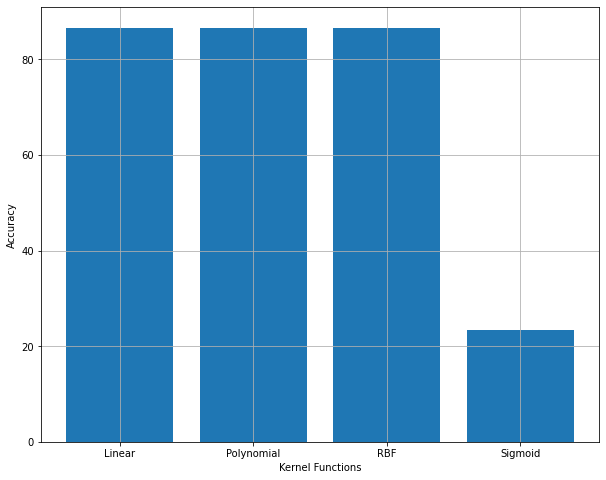

In [8]:
#plotting test accuracy for each kernel functions
plt.figure(figsize=(10,8))
plt.grid()
plt.bar(kernels, acc)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy');

#### RBF with different gammas

In [9]:
rbf_svc_3 = svm.SVC(kernel='rbf', gamma=0.3, C=C).fit(x_train, y_train)
rbf_svc_5 = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(x_train, y_train)
rbf_svc_7 = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
rbf_svc_9 = svm.SVC(kernel='rbf', gamma=0.9, C=C).fit(x_train, y_train)

In [10]:
#prediction for accuracy
pred_rbf_3 = rbf_svc_3.predict(x_test)
pred_rbf_5 = rbf_svc_5.predict(x_test)
pred_rbf_7 = rbf_svc_7.predict(x_test)
pred_rbf_9 = rbf_svc_9.predict(x_test)

acc_3 = accuracy_score(y_test, pred_rbf_3)*100
acc_5 = accuracy_score(y_test, pred_rbf_5)*100
acc_7 = accuracy_score(y_test, pred_rbf_7)*100
acc_9 = accuracy_score(y_test, pred_rbf_9)*100

### Visualising comparative analysis of gamma = 0.3, 0.5, 0.7, 0.9

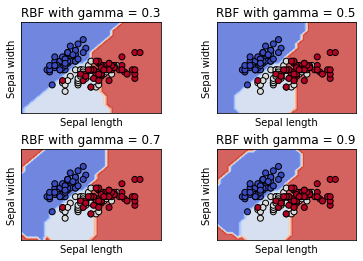

In [11]:
#Contour plot
h = 0.2

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['RBF with gamma = 0.3','RBF with gamma = 0.5','RBF with gamma = 0.7','RBF with gamma = 0.9']
 

for i, clf in enumerate((rbf_svc_3, rbf_svc_5, rbf_svc_7, rbf_svc_9)):

  
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='black')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()